In [1]:
# Importing libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from scipy import stats

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, SGDRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [4]:
#Read/Importing data
df= pd.read_excel(r'IPOs.xlsx')

In [5]:
#To Display all the rows and columns of table
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None) 

In [6]:
## Data Cleaning and Preprocessing

In [7]:
#To display top 5 rows of the table
df.head()

,Date,IPO Name,Issue Size,QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing,CMP,Current
0,NaN,NaN,(in crores),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gains(%),NaN,Gains (%)
1,2023-10-07 00:00:00,Cyient DLM,740,0.40,5.80,14.02,4.17,265.0,401.00,420.75,58.77,496.25,87.26
2,2023-07-07 00:00:00,Ideaforge Tech,580.03,44.17,30.36,45.54,40.70,672.0,1298.55,1295.50,92.78,1171.80,74.38
3,2023-04-07 00:00:00,HMA Agro,480,0.77,1.84,0.52,0.88,585.0,615.00,584.75,-0.04,630.50,7.78
4,16-06-23,IKIO Lighting,625.94,52.60,19.91,5.68,21.83,285.0,449.90,403.75,41.67,411.25,44.3


In [8]:
df.columns

Index(['Date ', 'IPO Name ', 'Issue Size', 'QIB ', 'HNI ', 'RII ', 'Total ',
       'Issue', 'Listing Open', 'Listing Close', 'Listing', 'CMP', 'Current'],
      dtype='object')

In [9]:
#To rename column name
df.rename(columns={'IPO Name': 'IPO_Name', 
                   'Issue Size':'Issue_Size', 
                   'Issue': 'Issue_Price', 
                   'Listing Open': 'Listing_Open', 
                   'Listing Close': 'Listing_Close', 
                   'Listing': 'Listing_Gains', 
                   'Current': 'Current_Gains'},inplace=True) 

In [10]:
df.head()

,Date,IPO Name,Issue_Size,QIB,HNI,RII,Total,Issue_Price,Listing_Open,Listing_Close,Listing_Gains,CMP,Current_Gains
0,NaN,NaN,(in crores),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gains(%),NaN,Gains (%)
1,2023-10-07 00:00:00,Cyient DLM,740,0.40,5.80,14.02,4.17,265.0,401.00,420.75,58.77,496.25,87.26
2,2023-07-07 00:00:00,Ideaforge Tech,580.03,44.17,30.36,45.54,40.70,672.0,1298.55,1295.50,92.78,1171.80,74.38
3,2023-04-07 00:00:00,HMA Agro,480,0.77,1.84,0.52,0.88,585.0,615.00,584.75,-0.04,630.50,7.78
4,16-06-23,IKIO Lighting,625.94,52.60,19.91,5.68,21.83,285.0,449.90,403.75,41.67,411.25,44.3


In [11]:
#To display number of rows and columns
df.shape

(343, 13)

In [12]:
#To display columns, data types, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           342 non-null    object 
 1   IPO Name       342 non-null    object 
 2   Issue_Size     343 non-null    object 
 3   QIB            342 non-null    float64
 4   HNI            342 non-null    float64
 5   RII            342 non-null    float64
 6   Total          342 non-null    float64
 7   Issue_Price    342 non-null    float64
 8   Listing_Open   342 non-null    float64
 9   Listing_Close  342 non-null    float64
 10  Listing_Gains  343 non-null    object 
 11  CMP            342 non-null    float64
 12  Current_Gains  341 non-null    object 
dtypes: float64(8), object(5)
memory usage: 35.0+ KB


In [13]:
#To display data types of columns
df.dtypes

Date              object
IPO Name          object
Issue_Size        object
QIB              float64
HNI              float64
RII              float64
Total            float64
Issue_Price      float64
Listing_Open     float64
Listing_Close    float64
Listing_Gains     object
CMP              float64
Current_Gains     object
dtype: object

In [14]:
#To display list of columns
df.columns

Index(['Date ', 'IPO Name ', 'Issue_Size', 'QIB ', 'HNI ', 'RII ', 'Total ',
       'Issue_Price', 'Listing_Open', 'Listing_Close', 'Listing_Gains', 'CMP',
       'Current_Gains'],
      dtype='object')

In [15]:
#To display number of missing values and treat them
df.isnull().sum()

Date             1
IPO Name         1
Issue_Size       0
QIB              1
HNI              1
RII              1
Total            1
Issue_Price      1
Listing_Open     1
Listing_Close    1
Listing_Gains    0
CMP              1
Current_Gains    2
dtype: int64

In [16]:
df.columns

Index(['Date ', 'IPO Name ', 'Issue_Size', 'QIB ', 'HNI ', 'RII ', 'Total ',
       'Issue_Price', 'Listing_Open', 'Listing_Close', 'Listing_Gains', 'CMP',
       'Current_Gains'],
      dtype='object')

In [17]:
df[df.isna().any(axis=1)]

,Date,IPO Name,Issue_Size,QIB,HNI,RII,Total,Issue_Price,Listing_Open,Listing_Close,Listing_Gains,CMP,Current_Gains
0,NaN,NaN,(in crores),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gains(%),NaN,Gains (%)
126,2019-08-05 00:00:00,Neogen,131.48,30.49,113.88,16.06,41.18,0.0,251.0,263.55,0,1570.8,NaN
140,2018-04-04 00:00:00,Mishra Dhatu Ni,438.38,1.96,0.12,0.72,1.21,0.0,93.1,90.00,0,306.0,NaN


In [18]:
#Droping both rows  as Issue price is 0 and current gains is NaN
df.dropna(axis=0, inplace=True)

In [19]:
#To display number of duplicate values
df.duplicated().sum()

0

In [20]:
df.columns

Index(['Date ', 'IPO Name ', 'Issue_Size', 'QIB ', 'HNI ', 'RII ', 'Total ',
       'Issue_Price', 'Listing_Open', 'Listing_Close', 'Listing_Gains', 'CMP',
       'Current_Gains'],
      dtype='object')

In [21]:
# Removing the spaces at the end of the column Name
df.rename(columns= lambda x: x.strip(),inplace=True)

In [22]:
#To display columns that are numeric and categorical
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Date', 'IPO Name', 'Issue_Size', 'Listing_Gains', 'Current_Gains'], dtype='object')
Index(['QIB', 'HNI', 'RII', 'Total', 'Issue_Price', 'Listing_Open',
       'Listing_Close', 'CMP'],
      dtype='object')


In [23]:
# Change data type of to Issue_Size and Listing_Gains to float
df['Issue_Size'] = df['Issue_Size'].astype(float)
df['Listing_Gains'] = df['Listing_Gains'].astype(float)

In [24]:
#To display columns that are numeric and categorical
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Date', 'IPO Name', 'Current_Gains'], dtype='object')
Index(['Issue_Size', 'QIB', 'HNI', 'RII', 'Total', 'Issue_Price',
       'Listing_Open', 'Listing_Close', 'Listing_Gains', 'CMP'],
      dtype='object')


In [25]:
# Convert Date column from string to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
# Extract year from Date column
df['year'] = df['Date'].dt.year

# Extract month from Date column
df['month'] = df['Date'].dt.month

# Extract day from Date column
df['day'] = df['Date'].dt.day

In [27]:
#To display values and its count for categorical columns
for i in df.columns:
    print(f'Feature {i}')
    print(f'Unique Values - {df[i].nunique()}')
    print(f'Value Counts\n{df[i].value_counts()}')
    print('-'*40)

Feature Date
Unique Values - 306
Value Counts
2021-08-16    4
2021-11-15    3
2010-08-10    3
2010-10-14    3
2010-10-27    3
2021-03-25    2
2010-06-10    2
2010-12-10    2
2011-10-19    2
2018-02-07    2
2021-11-18    2
2011-11-03    2
2022-05-24    2
2021-09-14    2
2021-07-19    2
2021-06-24    2
2011-07-07    2
2021-03-26    2
2020-01-10    2
2012-12-04    2
2020-12-10    2
2015-12-23    2
2015-10-09    2
2017-09-18    2
2022-11-21    2
2010-02-24    2
2010-02-15    2
2022-11-16    2
2014-09-05    1
2012-12-28    1
2016-07-11    1
2013-01-04    1
2013-05-06    1
2014-12-09    1
2016-10-19    1
2014-09-23    1
2014-01-10    1
2014-12-19    1
2015-03-19    1
2016-04-10    1
2012-12-27    1
2016-01-07    1
2015-06-04    1
2012-12-26    1
2016-08-11    1
2012-06-12    1
2012-07-18    1
2012-05-30    1
2016-09-12    1
2012-09-05    1
2016-12-19    1
2017-03-02    1
2012-03-28    1
2012-09-03    1
2011-02-11    1
2011-10-24    1
2016-09-29    1
2015-04-30    1
2015-09-04    1
2015-09-21

In [28]:
df[df['Issue_Size']==0]

,Date,IPO Name,Issue_Size,QIB,HNI,RII,Total,Issue_Price,Listing_Open,Listing_Close,Listing_Gains,CMP,Current_Gains,year,month,day
60,2021-11-15,Sigachi Ind,0.0,42.15,78.82,41.26,49.56,163.0,575.00,603.75,270.40,309.80,90.06,2021,11,15
240,2012-06-12,Tara Jewels,0.0,1.49,3.10,2.05,1.98,230.0,242.00,229.95,-0.02,0.76,-99.67,2012,6,12
301,2010-08-10,Electrosteel St,0.0,5.86,28.58,6.19,8.23,11.0,11.15,11.25,2.27,31.05,182.27,2010,8,10
338,2010-02-19,Thangamayil,0.0,0.52,1.52,2.26,1.12,75.0,70.00,35.55,-52.60,863.30,1051.07,2010,2,19


In [29]:
df.loc[60, 'Issue_Size']=125.43
df.loc[240, 'Issue_Size']=183.49
df.loc[301, 'Issue_Size']=248.07
df.loc[338, 'Issue_Size']=28.76

In [30]:
df[df['Total']==0]

,Date,IPO Name,Issue_Size,QIB,HNI,RII,Total,Issue_Price,Listing_Open,Listing_Close,Listing_Gains,CMP,Current_Gains,year,month,day
5,2023-05-19,Nexus Select,3200.00,0.0,0.0,0.0,0.0,100.0,102.27,104.26,4.26,116.27,16.27,2023,5,19
40,2022-07-04,Uma Exports,60.00,0.0,0.0,0.0,0.0,68.0,80.00,84.00,23.53,51.50,-24.26,2022,7,4
88,2021-05-14,PowerGrid InvIT,7734.99,0.0,0.0,0.0,0.0,100.0,104.00,102.98,2.98,115.25,15.25,2021,5,14
90,2021-07-04,Barbeque Nat,453.60,0.0,0.0,0.0,0.0,500.0,492.00,590.40,18.08,671.25,34.25,2021,7,4
196,2016-11-08,Dilip Buildcon,430.00,0.0,0.0,0.0,0.0,219.0,240.00,251.95,15.05,243.05,10.98,2016,11,8
212,2015-11-16,S H Kelkar,200.00,0.0,0.0,0.0,0.0,180.0,216.00,207.30,15.17,113.50,-36.94,2015,11,16
286,2010-12-15,MOIL,1260.00,0.0,0.0,0.0,0.0,375.0,551.00,233.25,-37.80,186.00,-50.4,2010,12,15


In [31]:
column_fill = ['QIB', 'HNI', 'RII','Total']

In [32]:
df.loc[5, column_fill] = 86.51, 172.43, 80.49, 101.91
df.loc[40, column_fill] = 2.81, 2.22, 10.11, 7.67
df.loc[88, column_fill] = 4.63, 5.07, 0.0, 4.83
df.loc[90, column_fill] = 5.11, 3.10, 13.13, 5.98
df.loc[196, column_fill] = 9.76, 79.64, 2.35, 20.95
df.loc[212, column_fill] = 25.55, 87.38, 1.98, 27.00
df.loc[286, column_fill] = 49.16, 143.30, 32.86, 56.43

In [33]:
#Removing Current Gains column as it will not affect listing gains
df.drop(['Current_Gains','CMP'] ,axis=1,inplace=True)

In [34]:
df.head()

,Date,IPO Name,Issue_Size,QIB,HNI,RII,Total,Issue_Price,Listing_Open,Listing_Close,Listing_Gains,year,month,day
1,2023-10-07,Cyient DLM,740.00,0.40,5.80,14.02,4.17,265.0,401.00,420.75,58.77,2023,10,7
2,2023-07-07,Ideaforge Tech,580.03,44.17,30.36,45.54,40.70,672.0,1298.55,1295.50,92.78,2023,7,7
3,2023-04-07,HMA Agro,480.00,0.77,1.84,0.52,0.88,585.0,615.00,584.75,-0.04,2023,4,7
4,2023-06-16,IKIO Lighting,625.94,52.60,19.91,5.68,21.83,285.0,449.90,403.75,41.67,2023,6,16
5,2023-05-19,Nexus Select,3200.00,86.51,172.43,80.49,101.91,100.0,102.27,104.26,4.26,2023,5,19


In [35]:
#Keeping copy of file for future reference
df1= df.copy()

In [36]:
# EDA - Exploratory Data Analysis

In [37]:
#To display basic statistical values for numeric columns
df.describe()

,Issue_Size,QIB,HNI,RII,Total,Issue_Price,Listing_Open,Listing_Close,Listing_Gains,year,month,day
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,1197.548353,25.598265,67.308088,8.756029,26.851676,378.014706,445.637147,389.874176,3.411676,2016.361765,7.247059,15.517647
std,2322.965725,39.887864,138.834285,14.855616,47.633969,346.925574,440.741278,403.903175,47.282141,4.509087,3.448418,8.568463
min,23.000000,0.000000,0.010000,0.000000,0.070000,10.000000,9.500000,1.570000,-97.150000,2010.000000,1.000000,1.000000
25%,188.222500,1.217500,1.345000,1.342500,1.695000,123.750000,134.700000,104.645000,-11.635000,2011.000000,4.000000,8.000000
50%,507.400000,5.390000,5.075000,3.405000,5.265000,257.500000,291.000000,264.250000,1.675000,2017.000000,8.000000,15.500000
75%,1115.995000,35.657500,61.025000,8.797500,32.290000,541.250000,600.000000,569.440000,23.500000,2021.000000,10.000000,23.000000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,2725.000000,3118.650000,270.400000,2023.000000,12.000000,31.000000


In [38]:
df.columns

Index(['Date', 'IPO Name', 'Issue_Size', 'QIB', 'HNI', 'RII', 'Total',
       'Issue_Price', 'Listing_Open', 'Listing_Close', 'Listing_Gains', 'year',
       'month', 'day'],
      dtype='object')

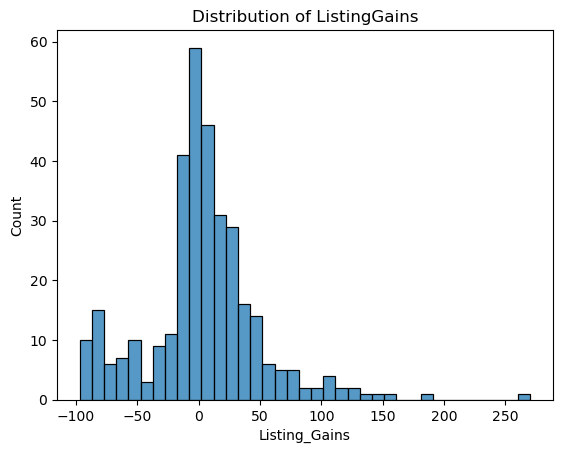

In [39]:
sns.histplot(x=df['Listing_Gains'])
plt.title(f'Distribution of ListingGains')
plt.savefig('Listing_Gains.png')
plt.show()

In [40]:
# Inference: Most IPOs have given listing gains between -20% and +50%

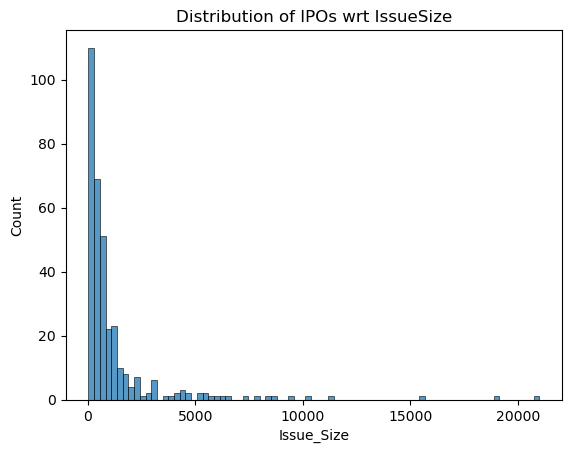

In [41]:
sns.histplot(x=df['Issue_Size'])
plt.title(f'Distribution of IPOs wrt IssueSize')
plt.savefig('Issue_Size.png')
plt.show()

In [42]:
# Inference: Most IPOs are listed with IPO Issue Size of less than Rs.1250 crore

In [43]:
issue10=df.groupby('IPO Name').sum().sort_values('Issue_Size', ascending=False).head(10)
issue10= issue10.reset_index()
issue10

,IPO Name,Issue_Size,QIB,HNI,RII,Total,Issue_Price,Listing_Open,Listing_Close,Listing_Gains,year,month,day
0,LIC India,21000.00,1.70,1.39,1.14,1.64,949.0,867.2,875.45,-7.75,2022,5,17
1,One 97 Paytm,18915.90,2.79,0.24,1.66,1.89,2150.0,1955.0,1564.15,-27.25,2021,11,18
2,Coal India,15475.00,24.70,25.40,2.31,15.28,245.0,300.0,342.35,39.73,2010,4,11
3,General Insuran,11372.00,2.25,0.22,0.63,1.38,912.0,870.4,435.20,-52.28,2017,10,25
4,SBI Card,10286.20,57.18,45.23,2.50,26.54,755.0,658.0,683.20,-9.51,2020,3,16
5,Zomato,9375.00,51.79,32.96,7.45,38.25,76.0,115.0,125.85,65.59,2021,7,23
6,HDFC Life,8695.01,16.60,2.29,0.90,4.89,290.0,313.0,344.25,18.71,2017,11,17
7,SBI Life Insura,8400.00,12.56,0.70,0.81,3.55,700.0,735.0,708.00,1.14,2017,3,10
8,PowerGrid InvIT,7734.99,4.63,5.07,0.00,4.83,100.0,104.0,102.98,2.98,2021,5,14
9,Star Health,7318.15,1.03,0.19,1.10,0.79,900.0,903.0,906.85,0.76,2021,10,12


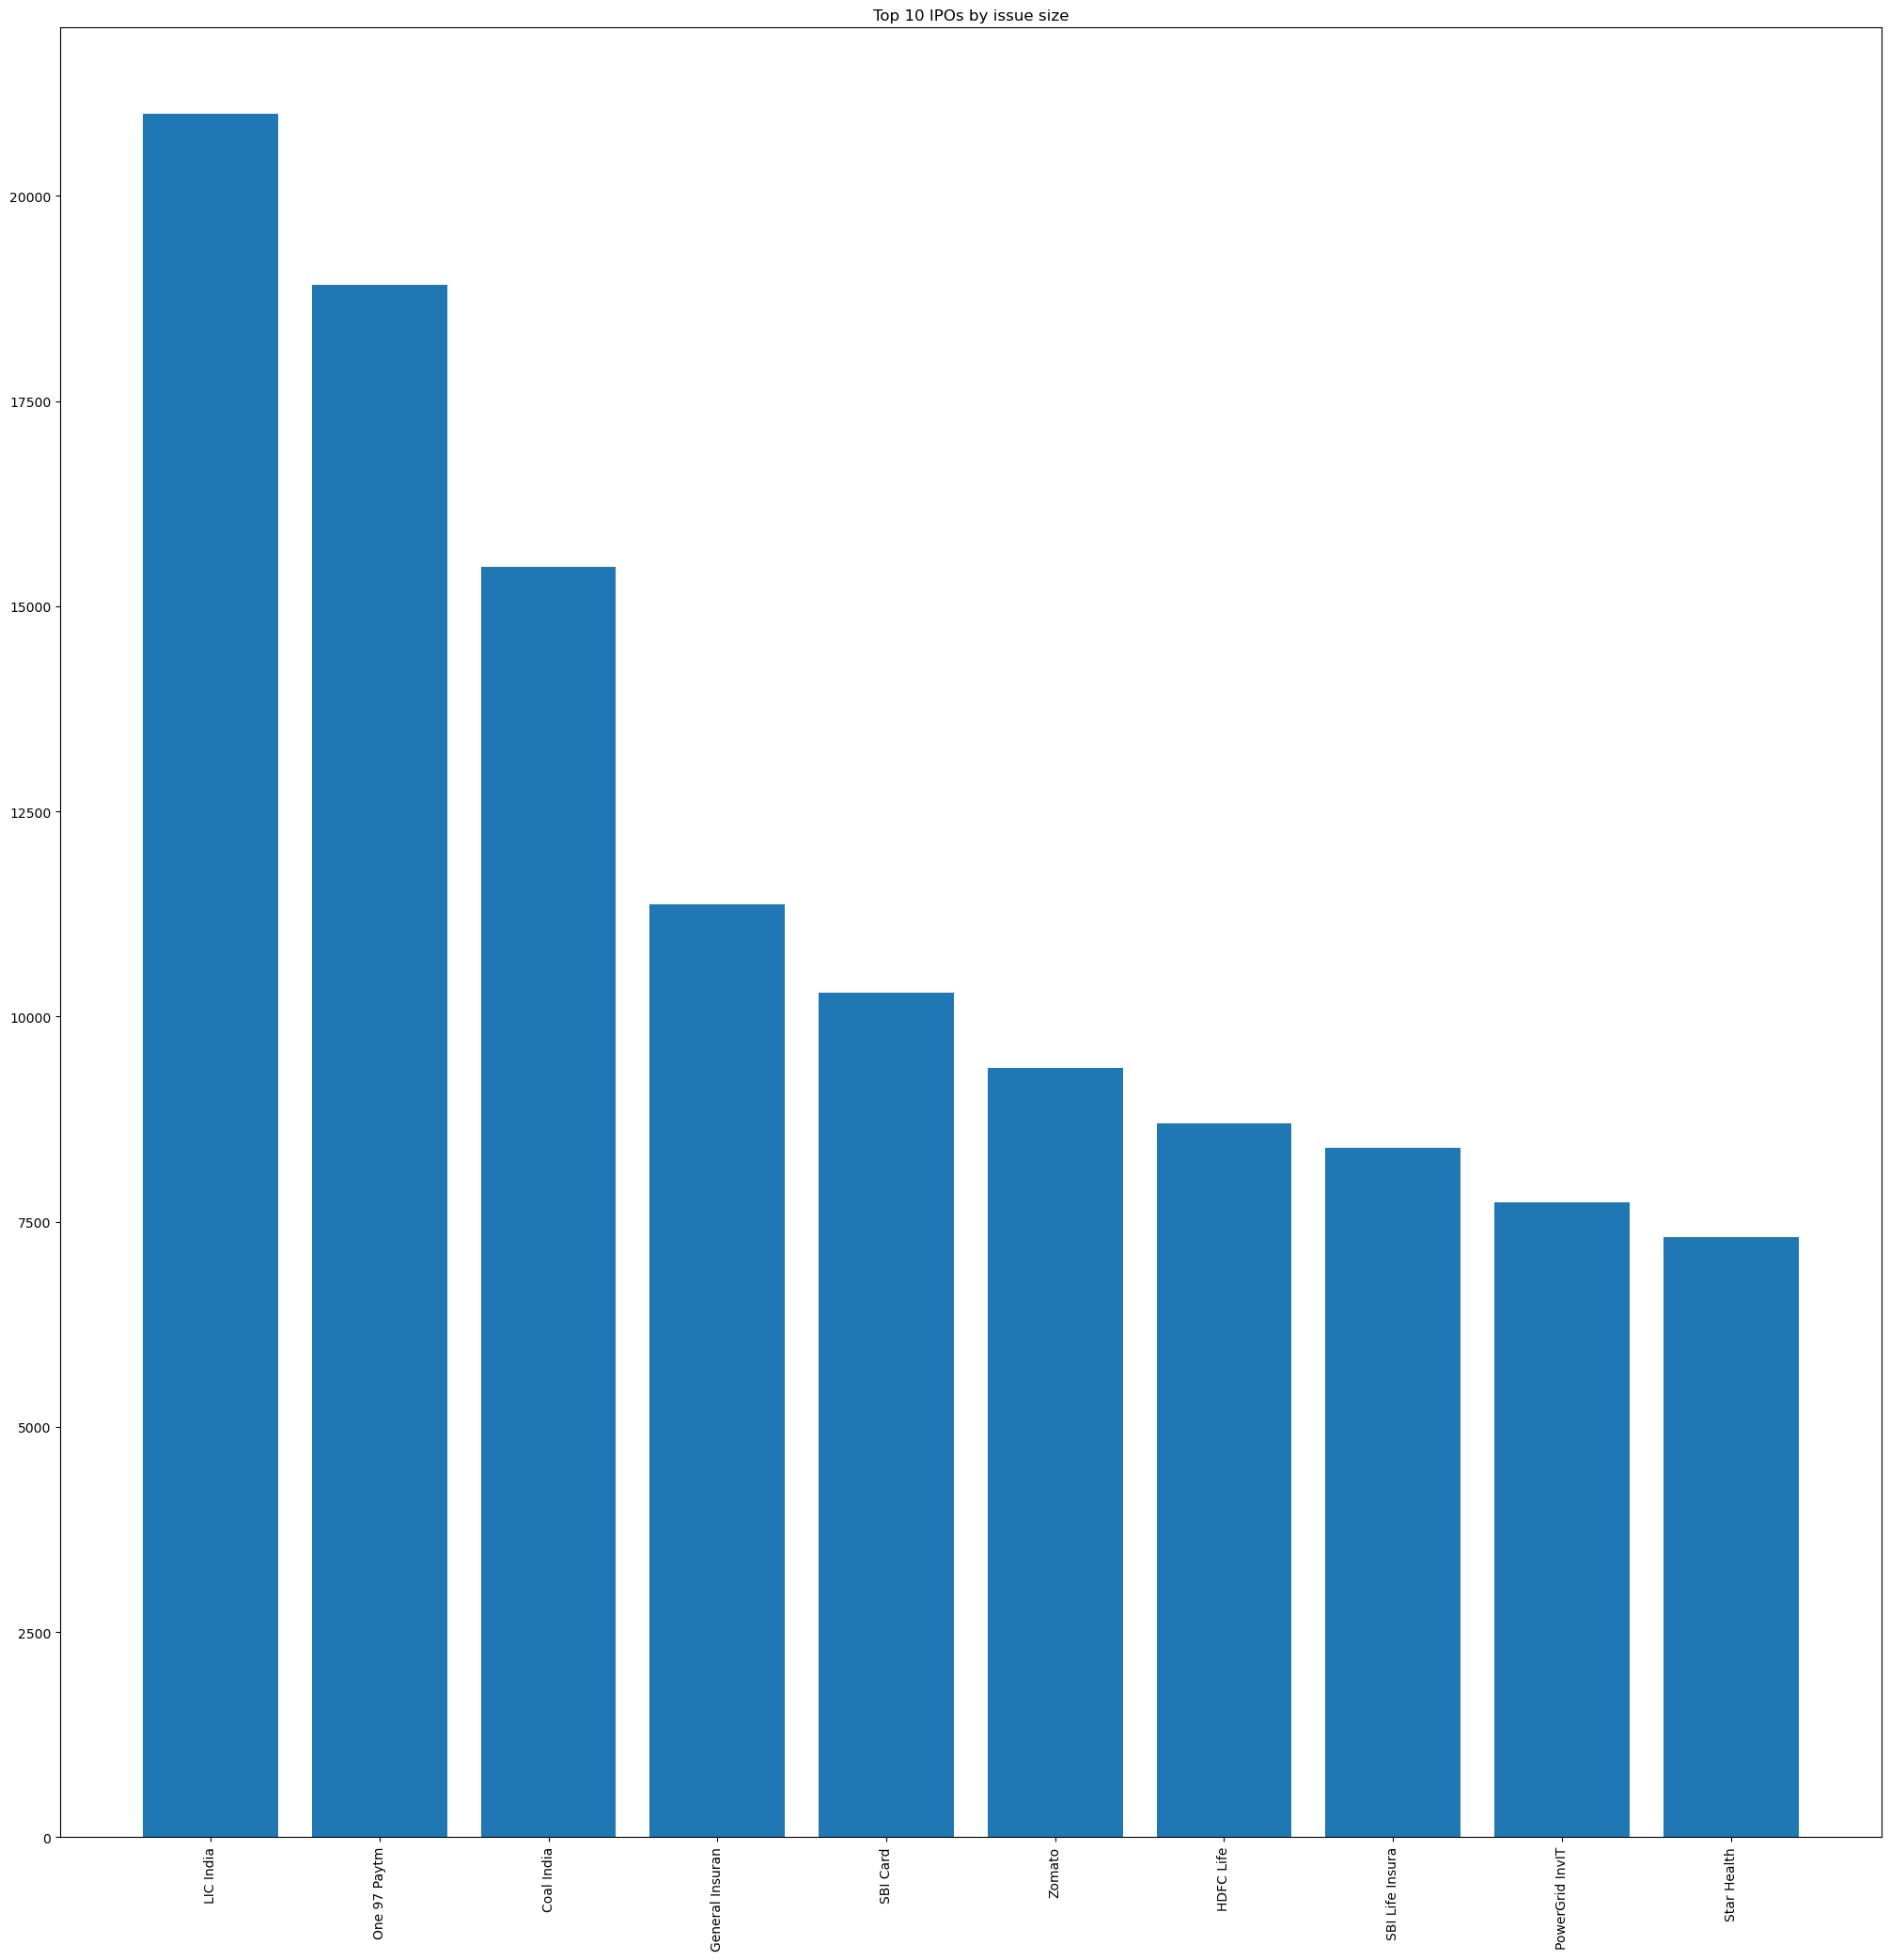

In [44]:
# To Display top 10 IPOs by issue size
plt.figure(figsize=(25, 25))
plt.bar(issue10['IPO Name'], issue10['Issue_Size'])
plt.title('Top 10 IPOs by issue size')
plt.xticks(rotation=90)
plt.savefig('issue10.png')
plt.show()

In [45]:
# Inference: LIC India and Paytm are IPOs that accumulated maximum amount from market

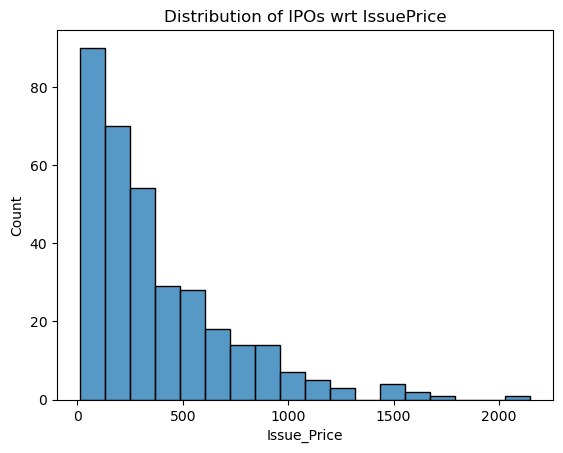

In [46]:
sns.histplot(x=df['Issue_Price'])
plt.title(f'Distribution of IPOs wrt IssuePrice')
plt.savefig('Listing_Price.png')
plt.show()

In [47]:
# Inference: Most IPOs are listed with Issue price of less than Rs.650

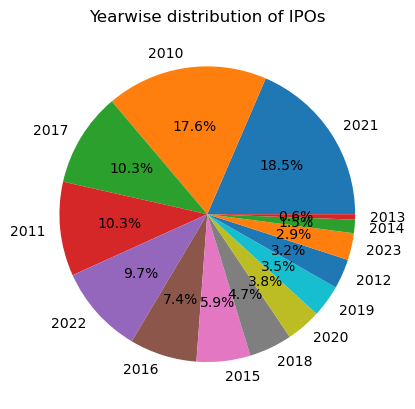

In [48]:
#To display yearwise number of IPOs in pie chart format 
count = df['year'].value_counts()
labels = count.index.tolist()
sizes = count.values.tolist()
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f'Yearwise distribution of IPOs')
plt.savefig('Year.png')
plt.show()

In [49]:
# Inference: 
# Most IPOs were listed in year 2021 and 2010.
# Least IPOs were listed from 2012 to 2014 and from 2018 to 2020.

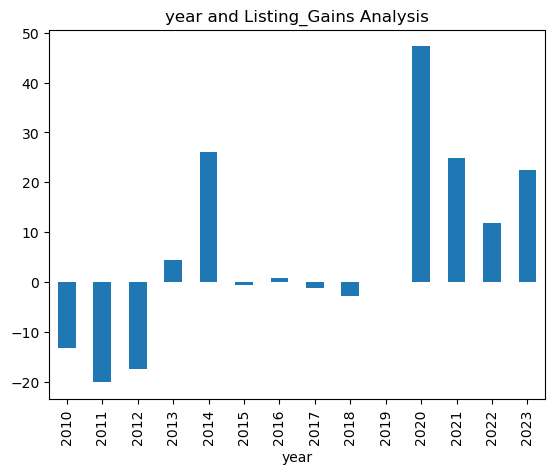

In [50]:
# To Display yearwise ListingGains trend
df.groupby("year").mean()["Listing_Gains"].plot(kind='bar')
plt.title("year and Listing_Gains Analysis")
plt.savefig('Year_Listing_Gains.png')
plt.show()

In [51]:
# Inference: 
# IPOs listed between 2010 and 2019 did not given much listing day gains except year 2014.
# IPOs listed between 2020 and 2023 have given best listing day gains.

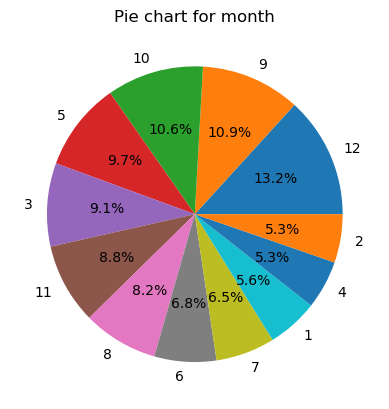

In [52]:
#To display monthwise number of IPOs in pie chart 
count = df['month'].value_counts()
labels = count.index.tolist()
sizes = count.values.tolist()
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f'Pie chart for month')
plt.savefig('month.png')
plt.show()

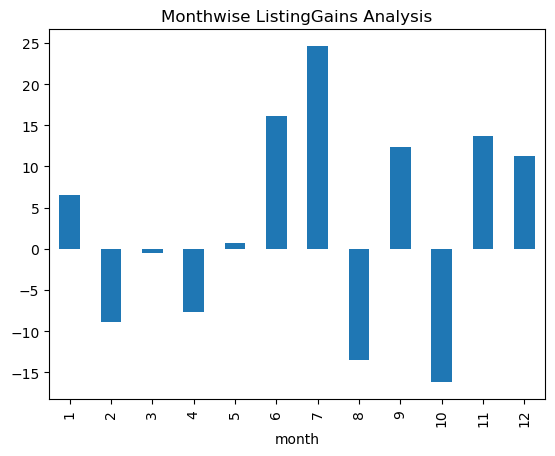

In [53]:
# To Display monthwise ListingGains trend
df.groupby("month").mean()["Listing_Gains"].plot(kind='bar')
plt.title("Monthwise ListingGains Analysis")
plt.savefig('Month_Listing_Gains.png')
plt.show()

In [54]:
# Inference: 
# IPOs listed in June and July have given maximum returns.

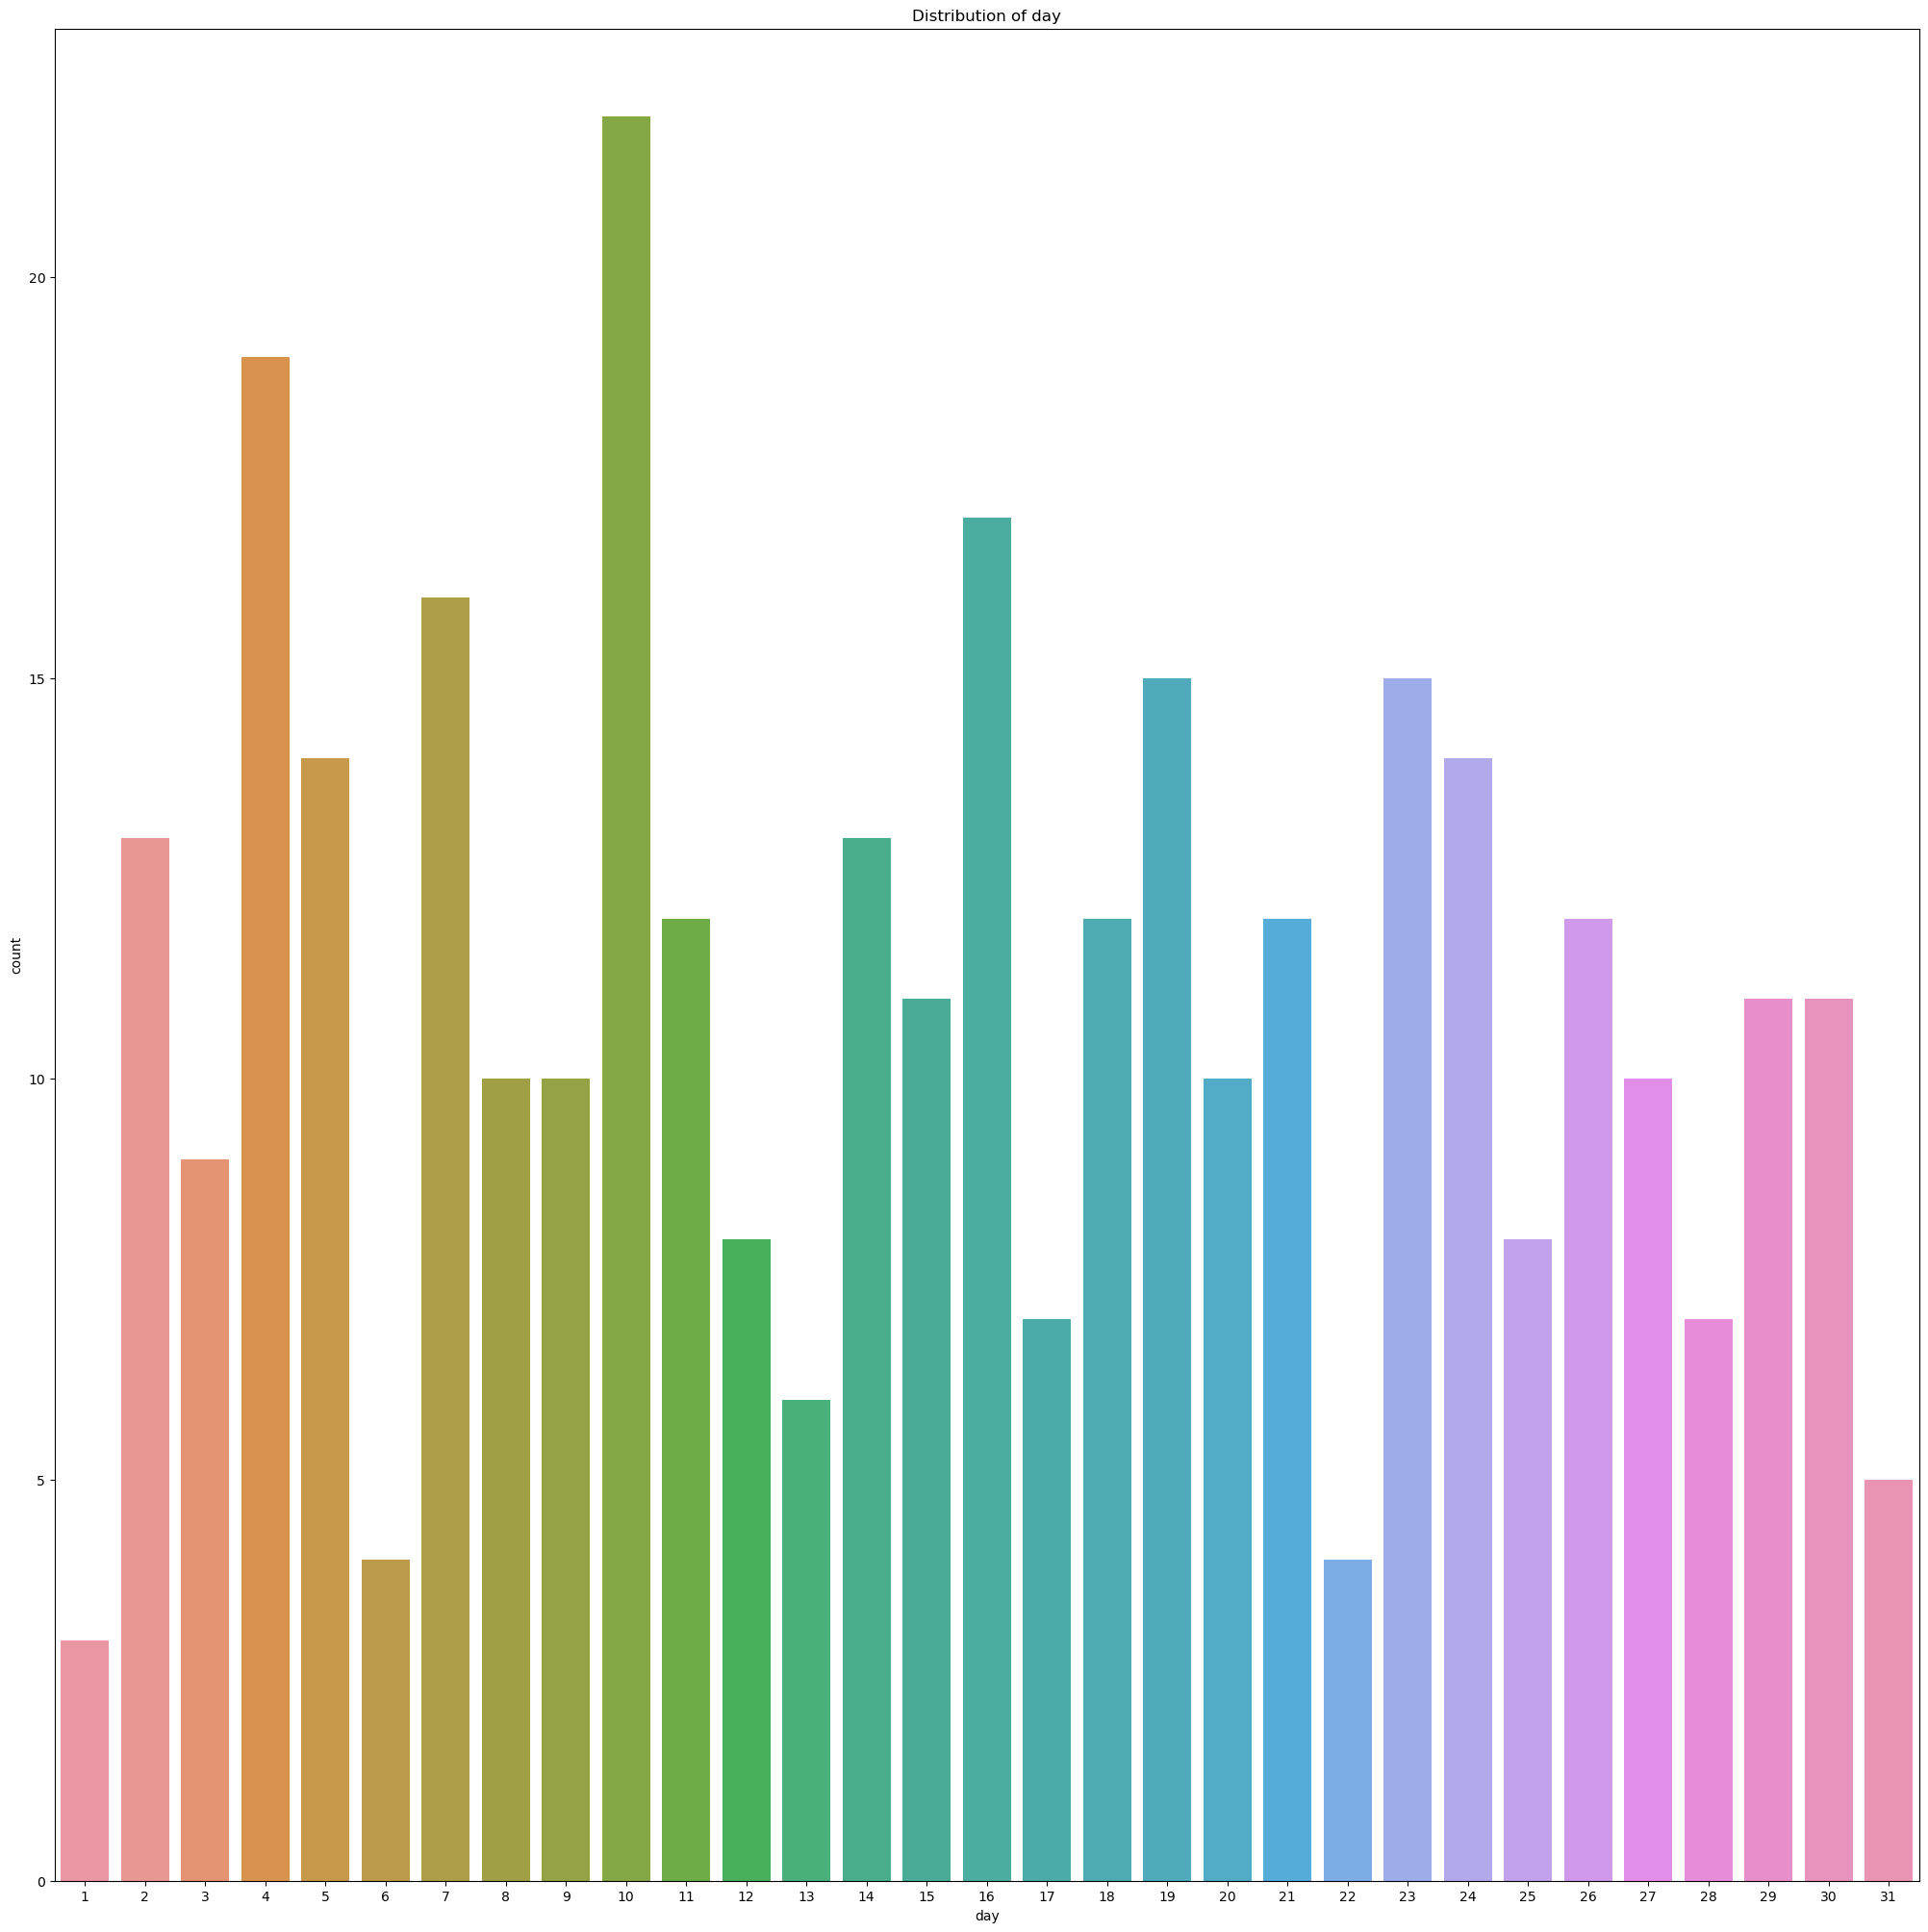

In [55]:
#To display daywise number of IPOs in bar chart 
plt.figure(figsize=(25,25))
sns.countplot(df['day'])
plt.title('Distribution of day')
plt.xlabel('day')
plt.savefig('day.png')
plt.show()

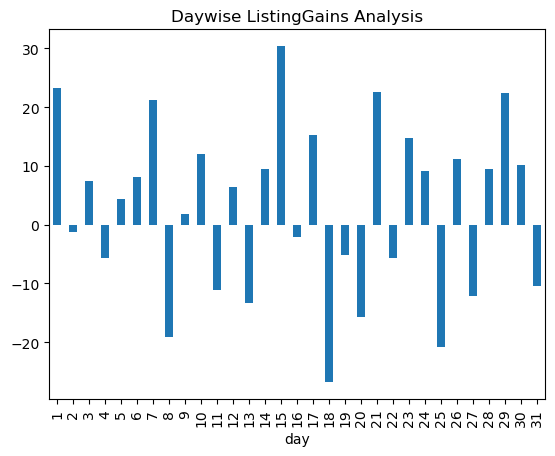

In [56]:
# To Display daywise ListingGains trend
df.groupby("day").mean()["Listing_Gains"].plot(kind='bar')
plt.title("Daywise ListingGains Analysis")
plt.savefig('Day_Listing_Gains.png')
plt.show()

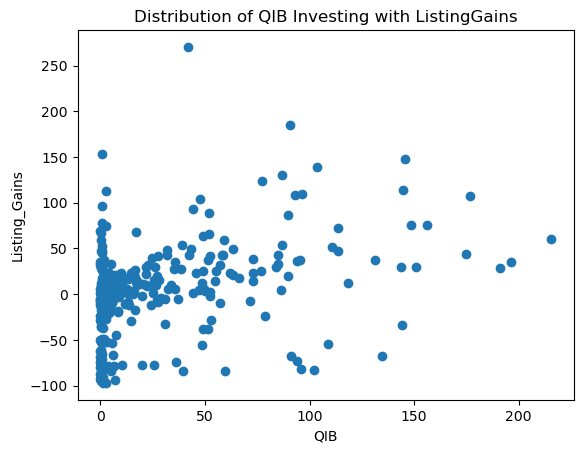

In [57]:
# To display trend of QIB Investing with ListingGains
plt.scatter(df['QIB'], df['Listing_Gains'])
plt.title('Distribution of QIB Investing with ListingGains')
plt.xlabel('QIB')
plt.ylabel('Listing_Gains')
plt.savefig('QIB_Listing_Gains.png')
plt.show()

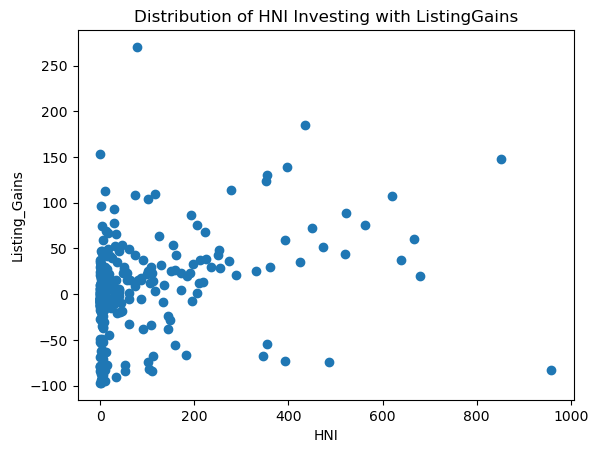

In [58]:
# To display trend of HNI Investing with ListingGains
plt.scatter(df['HNI'], df['Listing_Gains'])
plt.title('Distribution of HNI Investing with ListingGains')
plt.xlabel('HNI')
plt.ylabel('Listing_Gains')
plt.savefig('HNI_Listing_Gains.png')
plt.show()

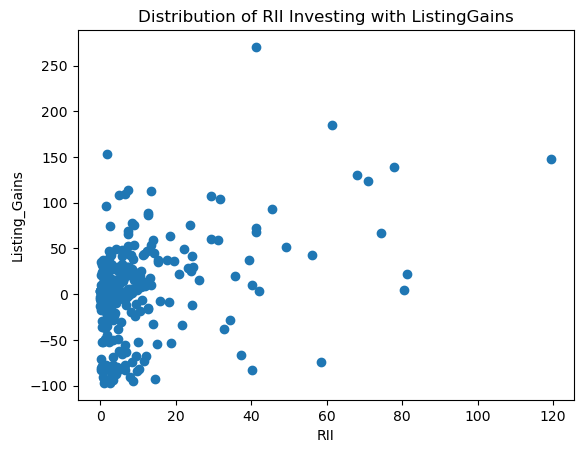

In [59]:
# To display trend of RII Investing with ListingGains
plt.scatter(df['RII'], df['Listing_Gains'])
plt.title('Distribution of RII Investing with ListingGains')
plt.xlabel('RII')
plt.ylabel('Listing_Gains')
plt.savefig('RII_Listing_Gains.png')
plt.show()

In [60]:
# More retail investors are concentrated for IPOs between -100 to +50 than QBI or HNI

In [61]:
top10=df.groupby('IPO Name').sum().sort_values('Listing_Gains', ascending=False).head(10)
top10= top10.reset_index()
top10

,IPO Name,Issue_Size,QIB,HNI,RII,Total,Issue_Price,Listing_Open,Listing_Close,Listing_Gains,year,month,day
0,Sigachi Ind,125.43,42.15,78.82,41.26,49.56,163.0,575.00,603.75,270.40,2021,11,15
1,Paras Defence,181.13,90.48,435.14,61.42,150.07,175.0,475.00,498.75,185.00,2021,1,10
2,Birla Pacific,65.18,1.04,0.17,1.82,1.18,10.0,10.10,25.35,153.50,2011,7,7
3,Latent View,622.11,145.48,850.66,119.44,326.49,197.0,530.00,488.60,148.02,2021,11,23
4,Astron Paper &,70.00,103.35,396.99,77.93,243.29,50.0,120.75,119.70,139.40,2017,12,29
5,Restaurant Bran,796.50,86.64,354.11,68.15,156.65,60.0,115.35,138.40,130.67,2020,12,14
6,Happiest Minds,702.02,77.43,351.46,70.94,150.98,166.0,351.00,371.00,123.49,2020,9,17
7,Avenue Supermar,1870.00,144.61,277.74,7.30,104.48,299.0,604.00,640.75,114.30,2017,3,21
8,Tatva Chintan,500.00,2.55,9.78,13.36,9.50,1083.0,2111.80,2310.25,113.32,2021,7,29
9,Indigo Paints,1170.56,96.21,115.76,6.50,54.84,1490.0,2607.50,3118.65,109.31,2021,2,2


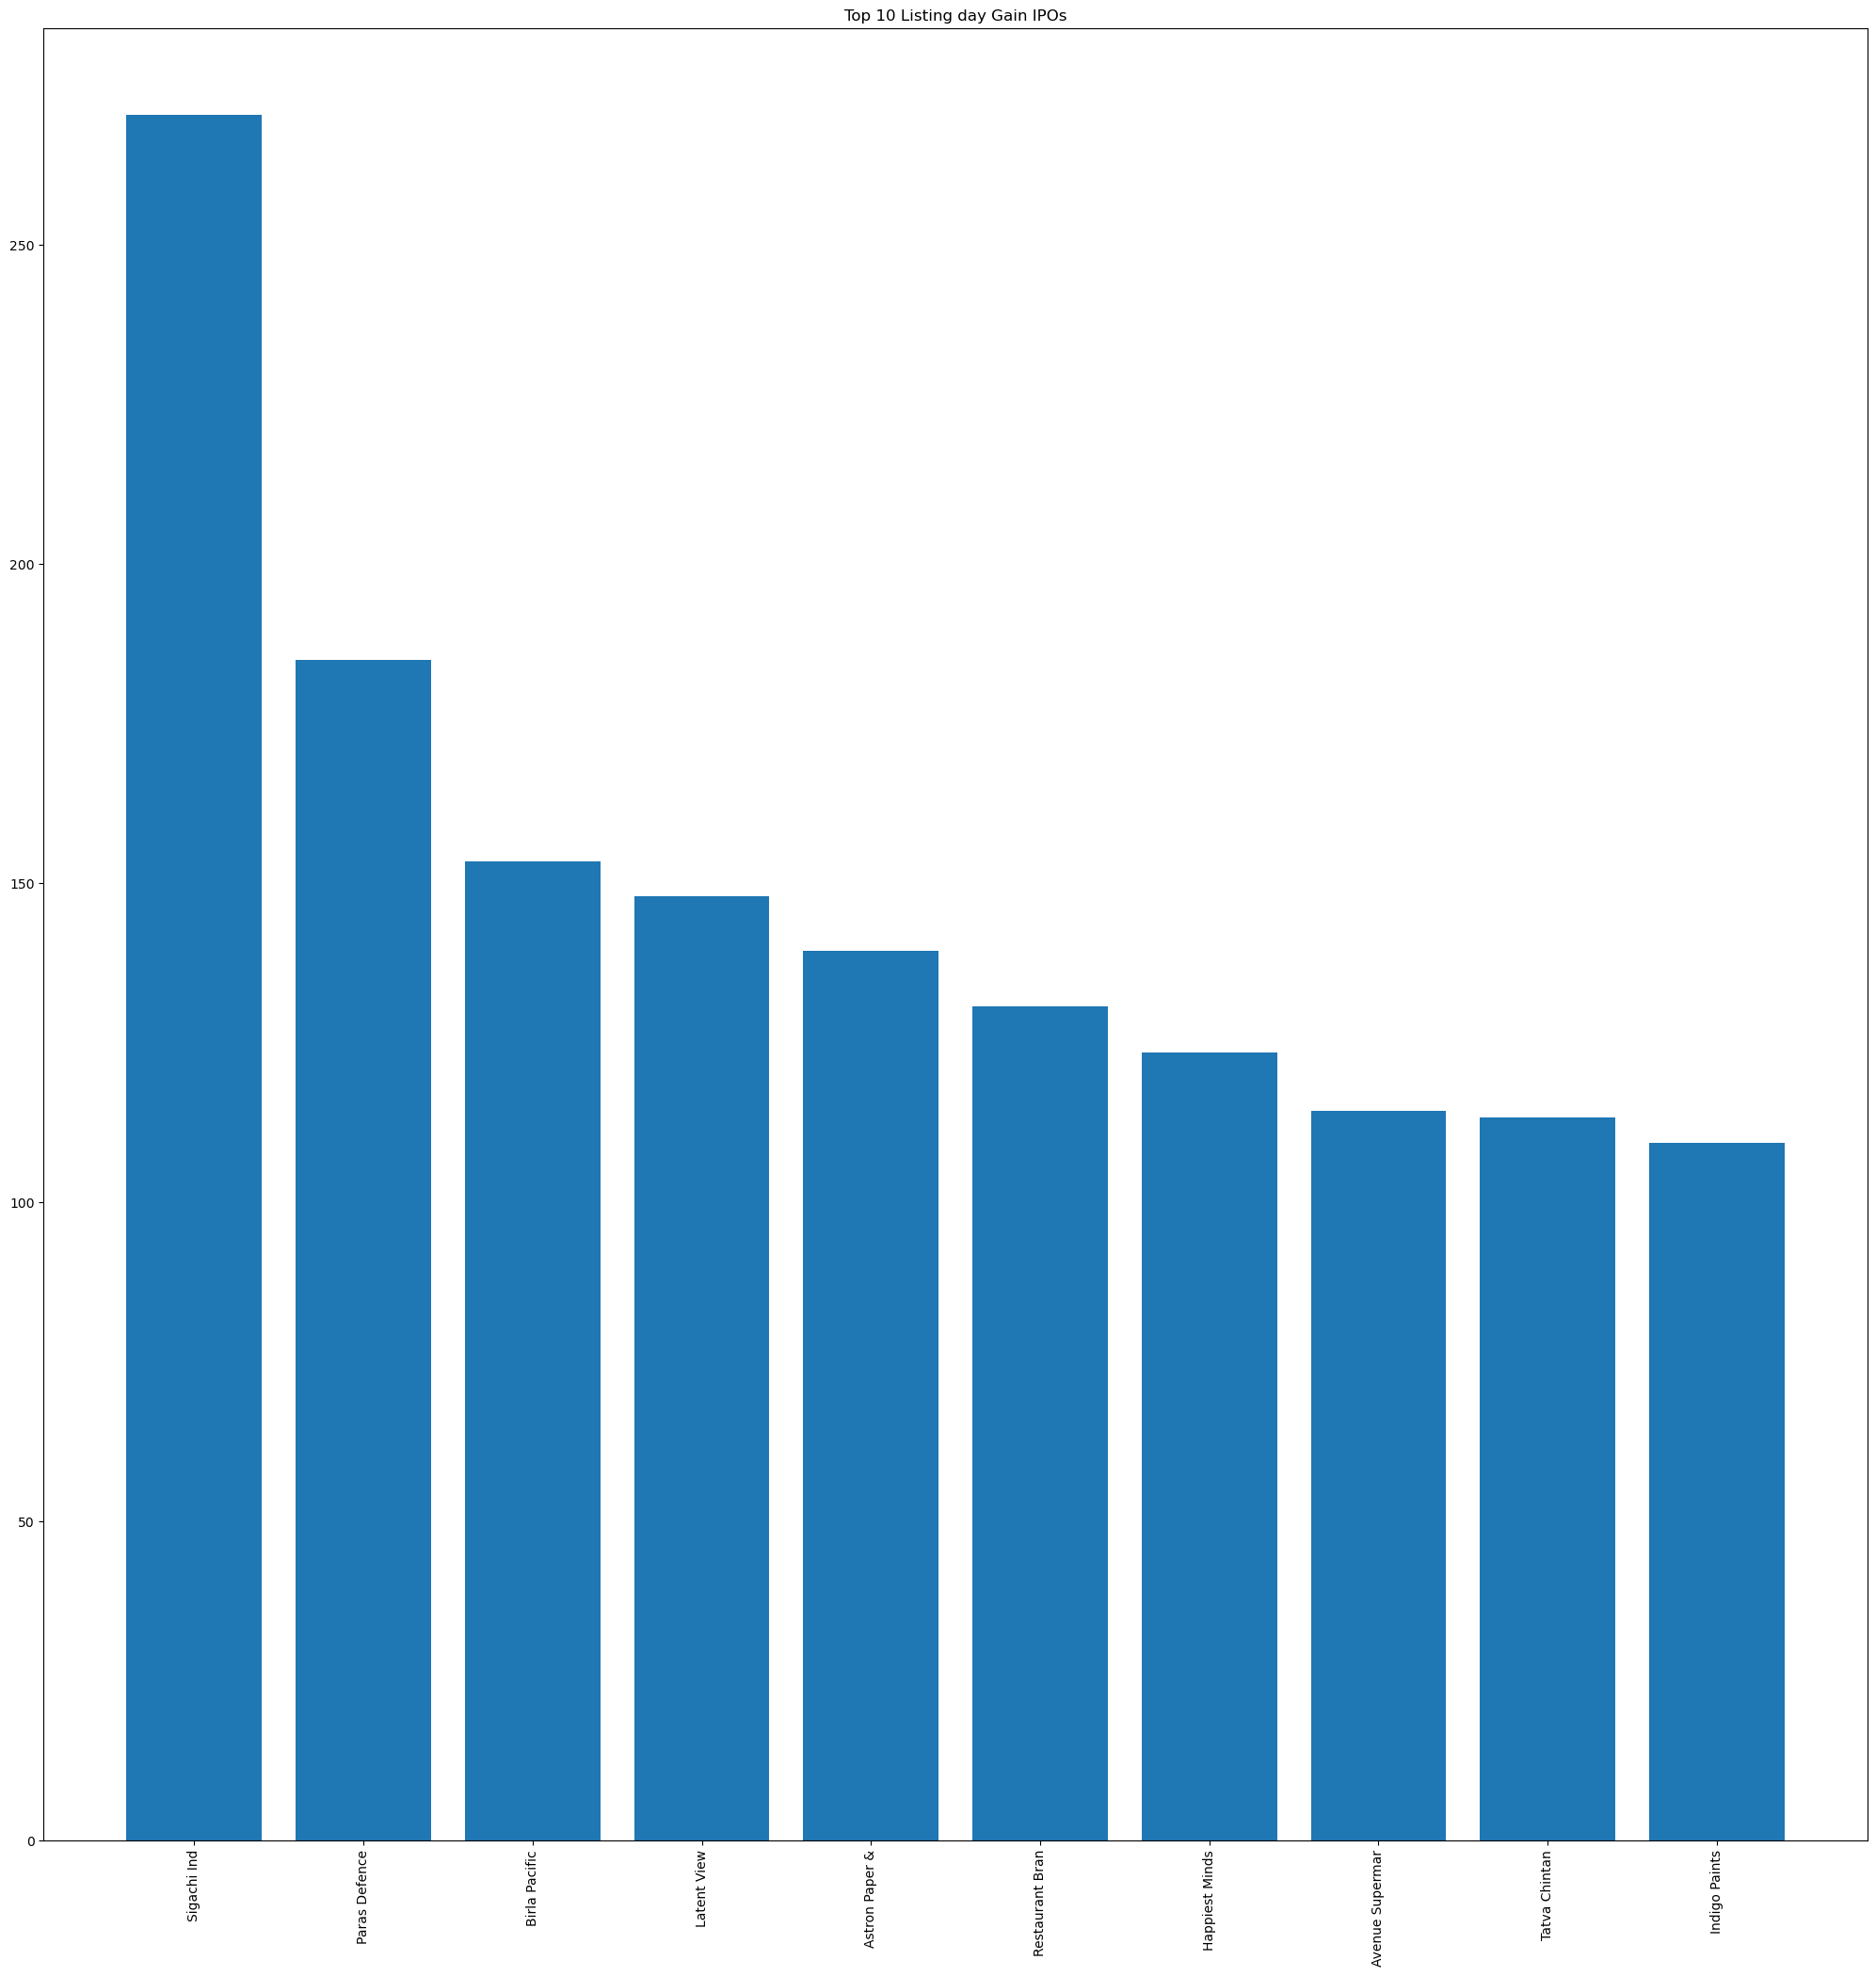

In [62]:
# To Display IPOs with top 10 listing day gains
plt.figure(figsize=(25, 25))
plt.bar(top10['IPO Name'], top10['Listing_Gains'])
plt.title('Top 10 Listing day Gain IPOs')
plt.xticks(rotation=90)
plt.savefig('top10.png')
plt.show()

In [63]:
Bottom10=df.groupby('IPO Name').sum().sort_values('Listing_Gains').head(10)
Bottom10= Bottom10.reset_index()
Bottom10

,IPO Name,Issue_Size,QIB,HNI,RII,Total,Issue_Price,Listing_Open,Listing_Close,Listing_Gains,year,month,day
0,VKS Projects,55.00,1.15,0.38,1.13,1.03,55.0,55.8,1.57,-97.15,2012,7,18
1,IEX,1000.70,2.56,0.85,2.61,2.28,1650.0,1500.0,54.22,-96.71,2017,10,23
2,Inventure Grow,81.90,0.25,9.49,8.66,4.58,117.0,119.0,5.20,-95.56,2011,4,8
3,NBCC (India),127.20,7.07,1.70,3.40,4.93,106.0,100.0,6.47,-93.90,2012,12,4
4,Easy Trip,510.00,0.00,2.79,14.48,3.39,187.0,182.0,13.02,-93.04,2021,3,19
5,BS Limited,197.36,0.52,3.16,1.04,1.10,248.0,251.0,18.93,-92.37,2010,10,27
6,Goenka Diamond,145.00,0.78,2.99,0.66,1.07,135.0,130.0,12.79,-90.53,2010,4,16
7,SHAH METACORP,54.67,1.54,33.44,8.00,8.59,71.0,76.6,7.01,-90.13,2010,10,27
8,Aqua Logistics,150.00,0.26,5.07,3.00,1.94,220.0,225.0,24.46,-88.88,2010,2,23
9,Kridhan Infra,34.75,0.03,1.37,4.18,1.68,108.0,115.0,13.29,-87.69,2011,7,13


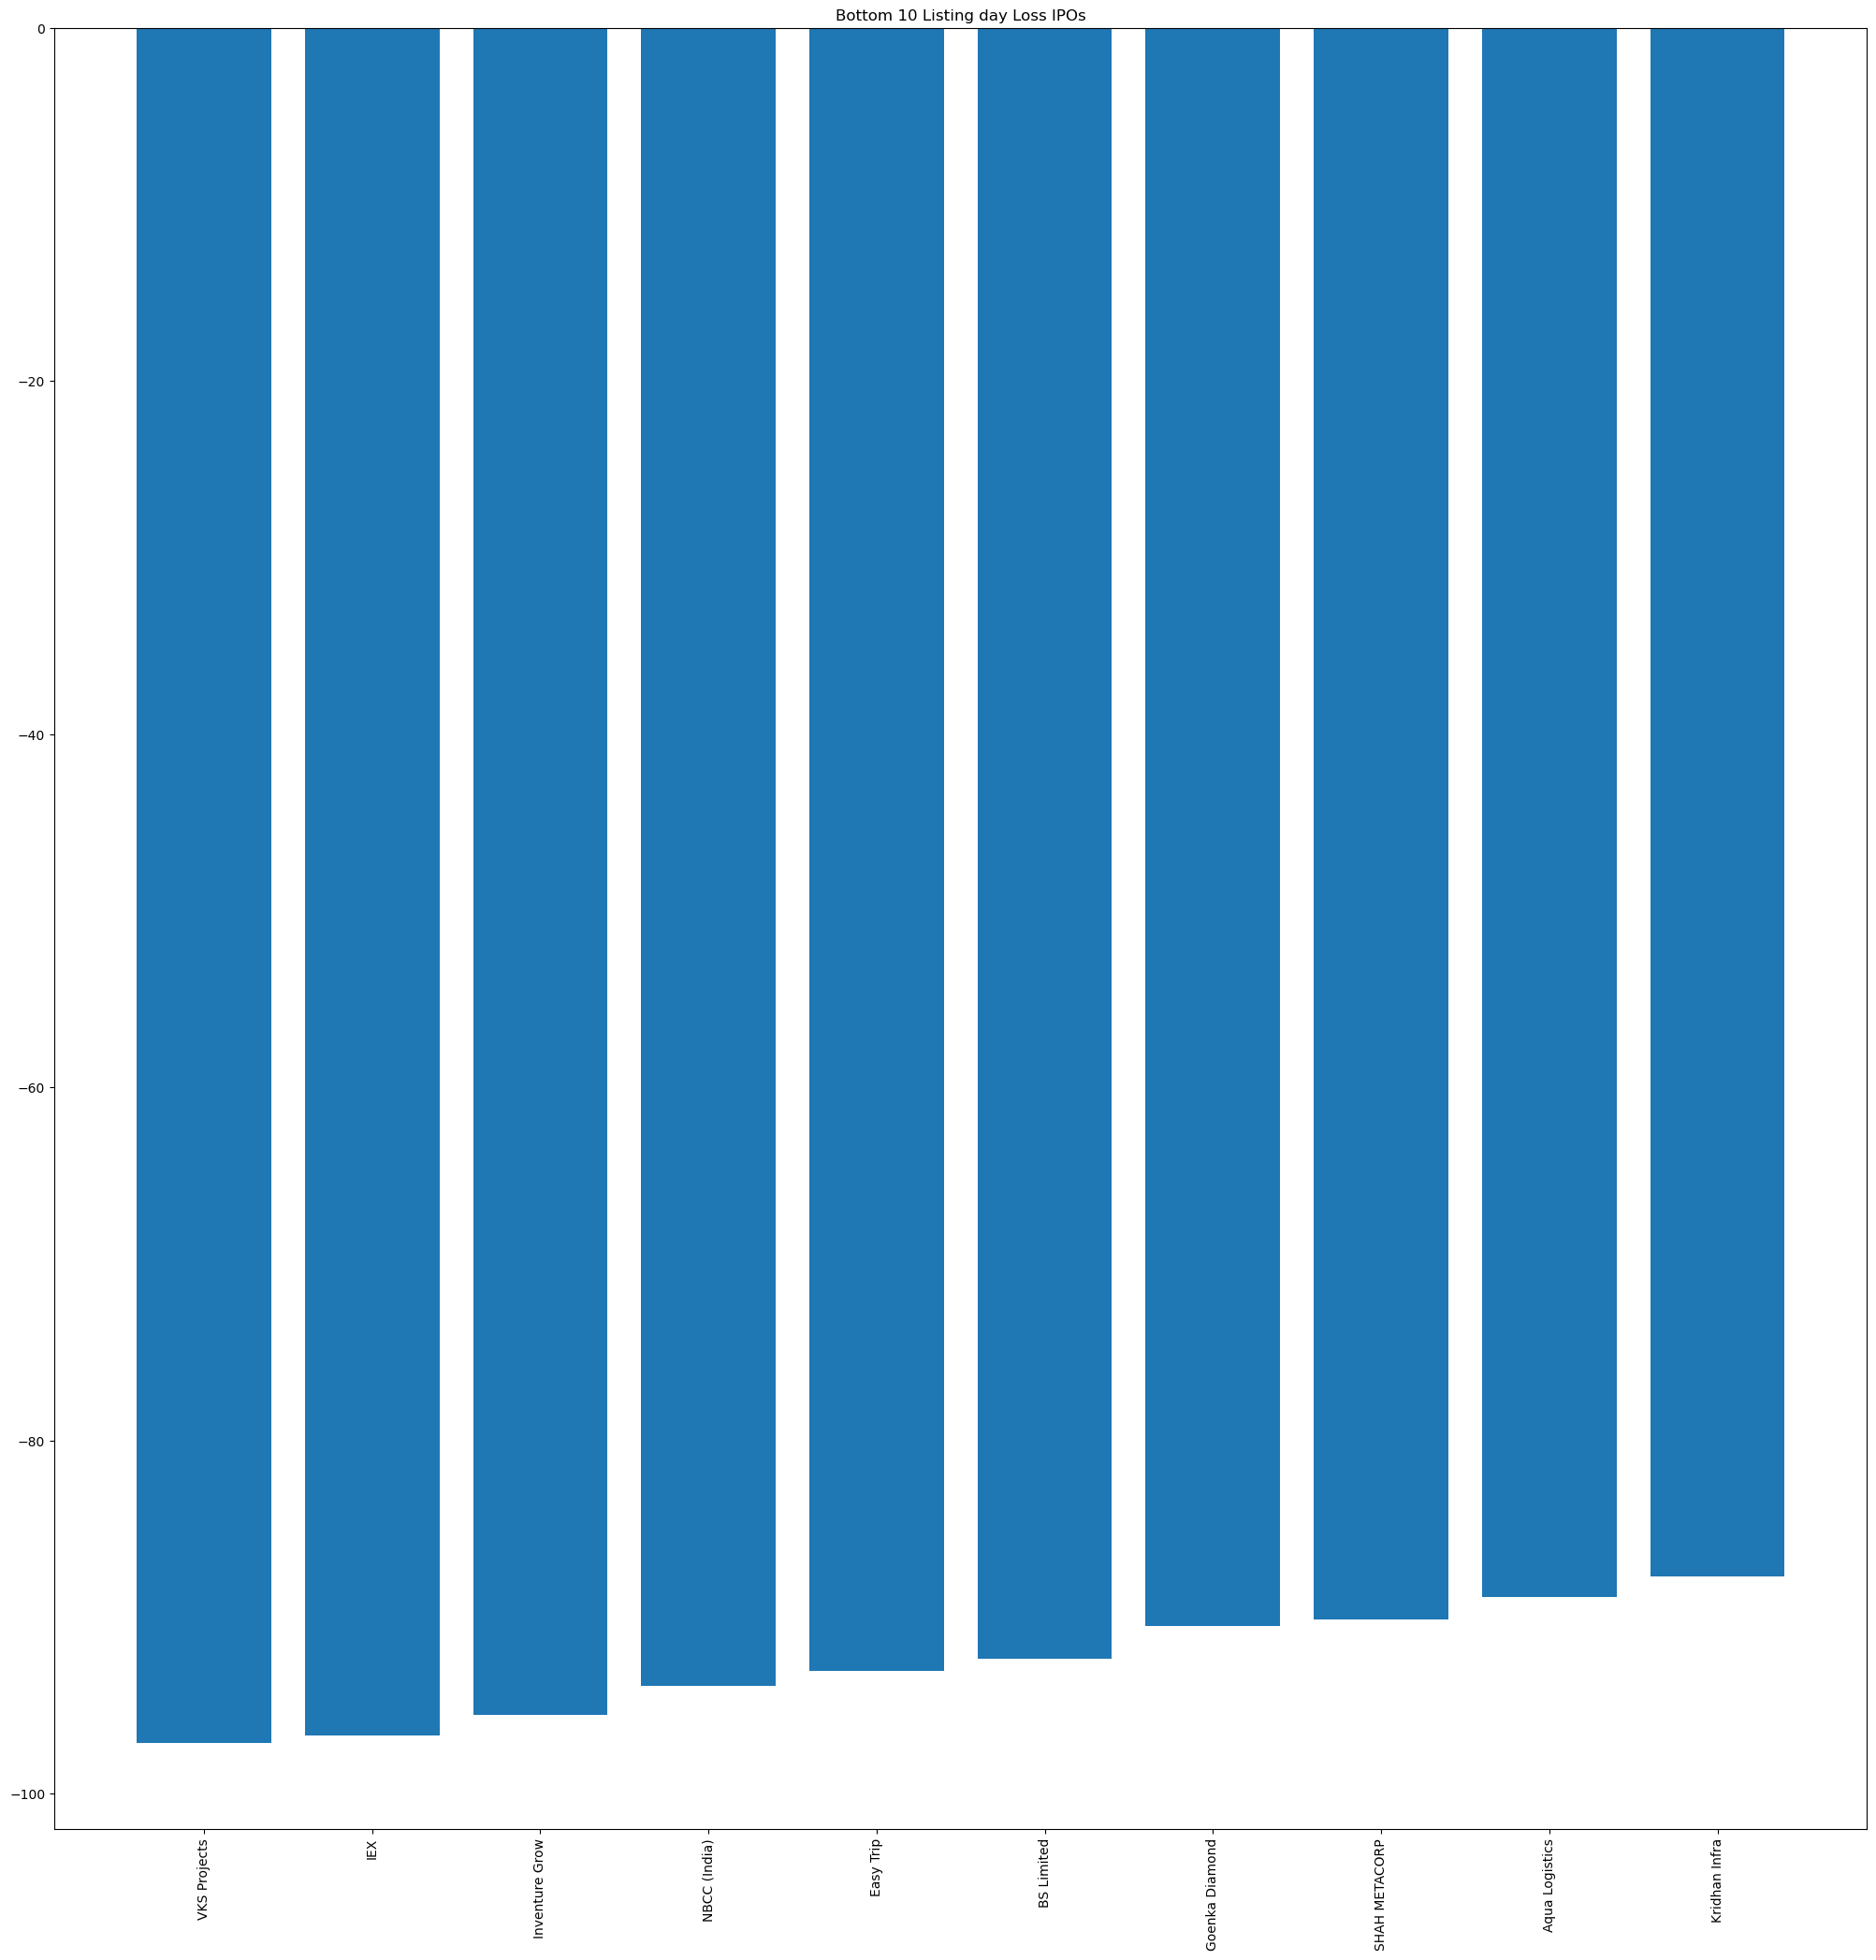

In [64]:
# To Display top 10 listing day loss making IPOs
plt.figure(figsize=(25, 25))
plt.bar(Bottom10['IPO Name'], Bottom10['Listing_Gains'])
plt.title('Bottom 10 Listing day Loss IPOs')
plt.xticks(rotation=90)
plt.savefig('Bottom10.png')
plt.show()

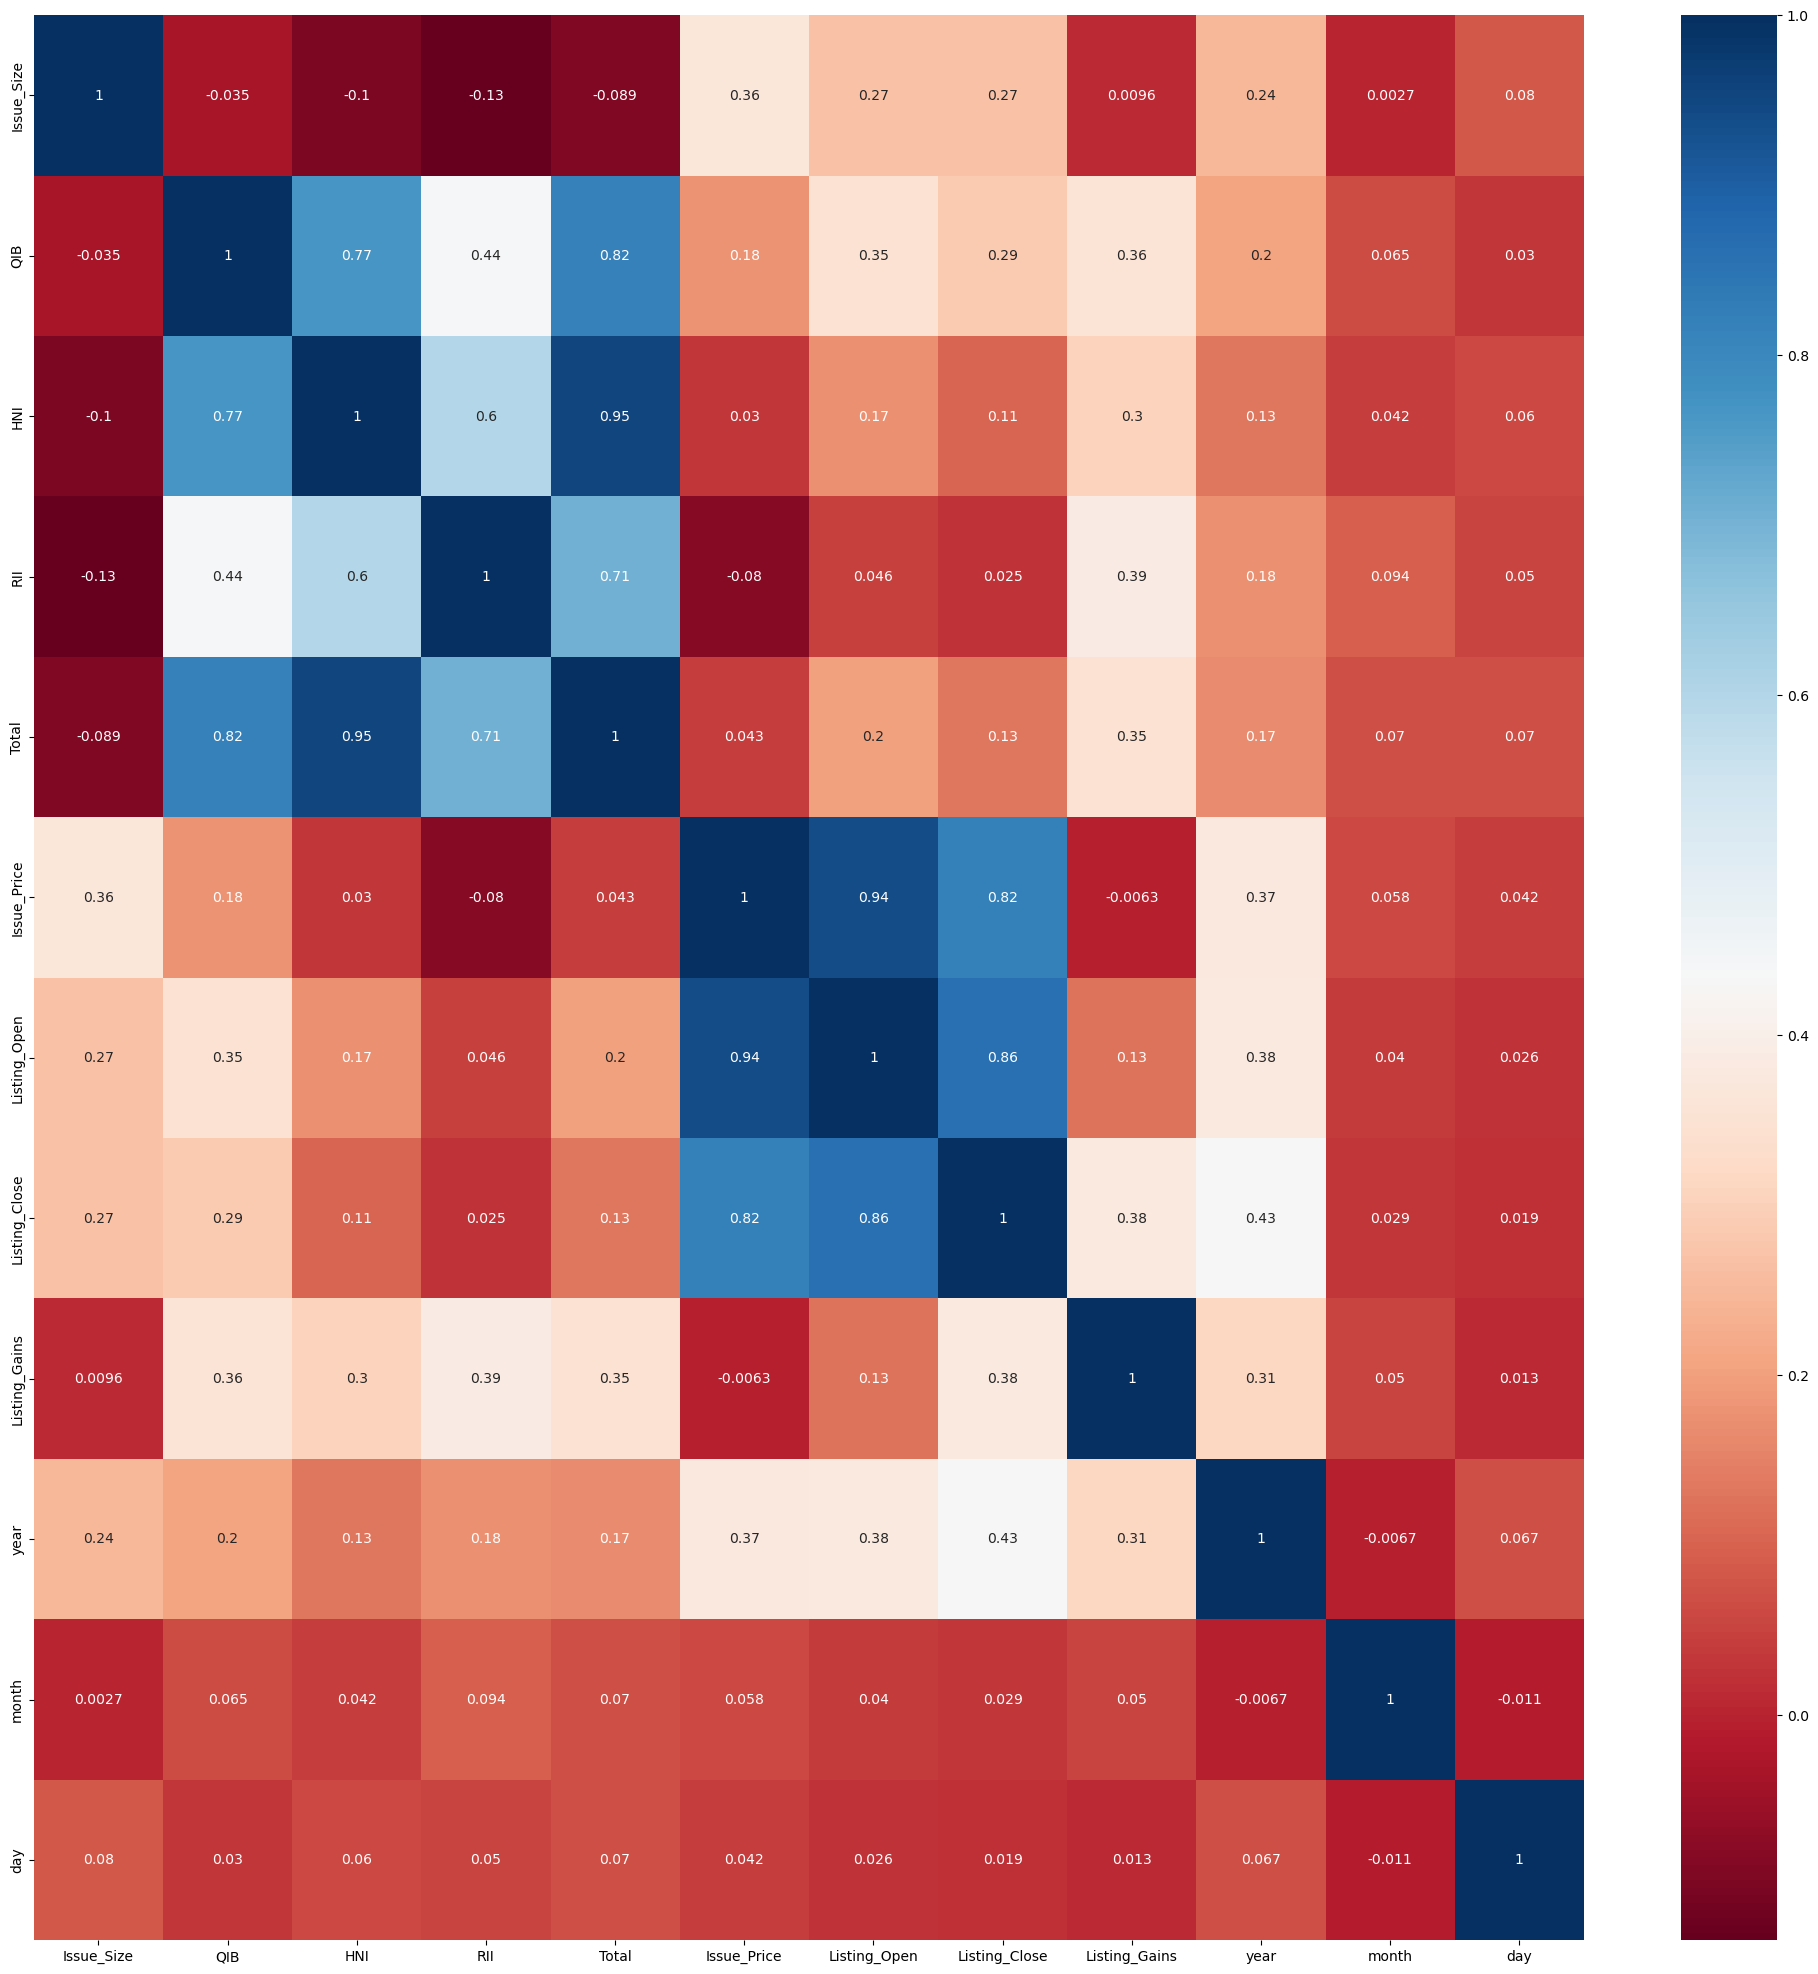

In [65]:
#To display correlation between ListingGains and different parameters 
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.savefig('Heatmap.png')
plt.show()

In [66]:
# Encoding categorical Columns

In [67]:
df.dtypes

Date             datetime64[ns]
IPO Name                 object
Issue_Size              float64
QIB                     float64
HNI                     float64
RII                     float64
Total                   float64
Issue_Price             float64
Listing_Open            float64
Listing_Close           float64
Listing_Gains           float64
year                      int64
month                     int64
day                       int64
dtype: object

In [68]:
# Dropping date column as we already have day, month and year
df.drop('Date', axis=1, inplace=True)

In [69]:
df = pd.get_dummies(df,drop_first=True)
print(df.shape)
print(df.dtypes)

(340, 351)
Issue_Size                  float64
QIB                         float64
HNI                         float64
RII                         float64
Total                       float64
Issue_Price                 float64
Listing_Open                float64
Listing_Close               float64
Listing_Gains               float64
year                          int64
month                         int64
day                           int64
IPO Name_AAVAS Financier      uint8
IPO Name_ABSL AMC             uint8
IPO Name_AGS Transact         uint8
IPO Name_AMI Organics         uint8
IPO Name_APTUS VALUE          uint8
IPO Name_ARSS Infra           uint8
IPO Name_AU Small Financ      uint8
IPO Name_Acropetal Tech       uint8
IPO Name_Adani Wilmar         uint8
IPO Name_Advanced Enzyme      uint8
IPO Name_Aether Ind           uint8
IPO Name_Alkem Lab            uint8
IPO Name_Amber Enterpris      uint8
IPO Name_Anand Rathi          uint8
IPO Name_Angel One            uint8
IPO Name_Antony W

In [70]:
# Creating Function to evalute the model performance

In [71]:
def eval_model(model,x_train,x_test,y_train,y_test):
    global train_score, test_score, mae, mse, rmse, r2, ypred

    model.fit(x_train,y_train)
    train_score = round(model.score(x_train,y_train),2)
    test_score = round(model.score(x_test,y_test),2)
    y_pred = model.predict(x_test)

    mae = round(mean_absolute_error(y_test,y_pred),2)
    mse = round(mean_squared_error(y_test,y_pred),2)
    rmse = round(np.sqrt(mse),2)
    r2 = round(r2_score(y_test,y_pred),2)

    print("Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²) Score: {r2}")
    
    print(f"Training Score: {train_score}")
    print(f"Testing Score: {test_score}")


In [72]:
score_card = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score', 
                                   'Mean Absolute Error (MAE)' , 'Mean Squared Error (MSE)', 
                                   'Root Mean Squared Error (RMSE)', 'R-squared Score'])

def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name, 
                                    'Train Score': train_score, 
                                    'Test Score': test_score,
                                    'Mean Absolute Error (MAE)' : mae, 
                                    'Mean Squared Error (MSE)': mse, 
                                    'Root Mean Squared Error (RMSE)': rmse, 
                                    'R-squared Score': r2}, ignore_index = True)
    return(score_card)

In [73]:
#Select the Dependent and Independent Features
x = df.drop('Listing_Gains',axis=1)
y = df['Listing_Gains']
print(type(x),type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(340, 350) (340,)


In [74]:
#Split the data into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1000)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(238, 350)
(102, 350)
(238,)
(102,)


In [75]:
# Linear regression

In [76]:
lr = LinearRegression()
eval_model(lr,x_train,x_test,y_train,y_test)

Evaluation Metrics:
Mean Absolute Error (MAE): 22.62
Mean Squared Error (MSE): 1550.41
Root Mean Squared Error (RMSE): 39.38
R-squared (R²) Score: 0.49
Training Score: 1.0
Testing Score: 0.49


In [77]:
update_score_card(model_name = 'Linear Regression')

,Model,Train Score,Test Score,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared Score
0,Linear Regression,1.0,0.49,22.62,1550.41,39.38,0.49


In [78]:
# Ridge Regression
ridge1 = Ridge(alpha=1)
eval_model(ridge1,x_train,x_test,y_train,y_test)

Evaluation Metrics:
Mean Absolute Error (MAE): 22.82
Mean Squared Error (MSE): 1573.11
Root Mean Squared Error (RMSE): 39.66
R-squared (R²) Score: 0.48
Training Score: 0.89
Testing Score: 0.48


In [79]:
update_score_card(model_name = 'Ridge Regression')

,Model,Train Score,Test Score,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared Score
0,Linear Regression,1.00,0.49,22.62,1550.41,39.38,0.49
1,Ridge Regression,0.89,0.48,22.82,1573.11,39.66,0.48


In [80]:
# Lasso Regression
lasso1 = Lasso(alpha=1)
eval_model(lasso1,x_train,x_test,y_train,y_test)

Evaluation Metrics:
Mean Absolute Error (MAE): 22.74
Mean Squared Error (MSE): 1565.43
Root Mean Squared Error (RMSE): 39.57
R-squared (R²) Score: 0.48
Training Score: 0.56
Testing Score: 0.48


In [81]:
update_score_card(model_name = 'Lasso Regression')

,Model,Train Score,Test Score,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared Score
0,Linear Regression,1.00,0.49,22.62,1550.41,39.38,0.49
1,Ridge Regression,0.89,0.48,22.82,1573.11,39.66,0.48
2,Lasso Regression,0.56,0.48,22.74,1565.43,39.57,0.48


In [82]:
# ElasticNetCV Regression
enet2 = ElasticNetCV(alphas=np.arange(0.1,1,0.01),cv=20)
eval_model(enet2,x_train,x_test,y_train,y_test)

Evaluation Metrics:
Mean Absolute Error (MAE): 22.79
Mean Squared Error (MSE): 1573.21
Root Mean Squared Error (RMSE): 39.66
R-squared (R²) Score: 0.48
Training Score: 0.61
Testing Score: 0.48


In [83]:
update_score_card(model_name = 'ElasticNetCV Regression')

,Model,Train Score,Test Score,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared Score
0,Linear Regression,1.00,0.49,22.62,1550.41,39.38,0.49
1,Ridge Regression,0.89,0.48,22.82,1573.11,39.66,0.48
2,Lasso Regression,0.56,0.48,22.74,1565.43,39.57,0.48
3,ElasticNetCV Regression,0.61,0.48,22.79,1573.21,39.66,0.48


In [84]:
# DecisionTree Regression  #criterion='squared_error', max_depth=N, min_samples_split=N
dt = DecisionTreeRegressor(criterion='squared_error')
eval_model(dt,x_train,x_test,y_train,y_test)

Evaluation Metrics:
Mean Absolute Error (MAE): 27.53
Mean Squared Error (MSE): 1707.1
Root Mean Squared Error (RMSE): 41.32
R-squared (R²) Score: 0.44
Training Score: 1.0
Testing Score: 0.44


In [85]:
update_score_card(model_name = 'Decision Tree Regression')

,Model,Train Score,Test Score,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared Score
0,Linear Regression,1.00,0.49,22.62,1550.41,39.38,0.49
1,Ridge Regression,0.89,0.48,22.82,1573.11,39.66,0.48
2,Lasso Regression,0.56,0.48,22.74,1565.43,39.57,0.48
3,ElasticNetCV Regression,0.61,0.48,22.79,1573.21,39.66,0.48
4,Decision Tree Regression,1.00,0.44,27.53,1707.10,41.32,0.44


In [86]:
# Random Forest Regression
rf = RandomForestRegressor(bootstrap=True,max_features='auto',
                           min_samples_split=4,n_estimators=20, random_state=500)  
eval_model(rf,x_train,x_test,y_train,y_test)

Evaluation Metrics:
Mean Absolute Error (MAE): 23.98
Mean Squared Error (MSE): 1428.97
Root Mean Squared Error (RMSE): 37.8
R-squared (R²) Score: 0.53
Training Score: 0.9
Testing Score: 0.53


In [87]:
update_score_card(model_name = 'Random Forest Regression')

,Model,Train Score,Test Score,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared Score
0,Linear Regression,1.00,0.49,22.62,1550.41,39.38,0.49
1,Ridge Regression,0.89,0.48,22.82,1573.11,39.66,0.48
2,Lasso Regression,0.56,0.48,22.74,1565.43,39.57,0.48
3,ElasticNetCV Regression,0.61,0.48,22.79,1573.21,39.66,0.48
4,Decision Tree Regression,1.00,0.44,27.53,1707.10,41.32,0.44
5,Random Forest Regression,0.90,0.53,23.98,1428.97,37.80,0.53


In [88]:
# Support Vector Regression
sv = SVR()
eval_model(sv,x_train,x_test,y_train,y_test)

Evaluation Metrics:
Mean Absolute Error (MAE): 36.93
Mean Squared Error (MSE): 2979.58
Root Mean Squared Error (RMSE): 54.59
R-squared (R²) Score: 0.02
Training Score: 0.02
Testing Score: 0.02


In [89]:
update_score_card(model_name = 'Support Vector Regression')

,Model,Train Score,Test Score,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared Score
0,Linear Regression,1.00,0.49,22.62,1550.41,39.38,0.49
1,Ridge Regression,0.89,0.48,22.82,1573.11,39.66,0.48
2,Lasso Regression,0.56,0.48,22.74,1565.43,39.57,0.48
3,ElasticNetCV Regression,0.61,0.48,22.79,1573.21,39.66,0.48
4,Decision Tree Regression,1.00,0.44,27.53,1707.10,41.32,0.44
5,Random Forest Regression,0.90,0.53,23.98,1428.97,37.80,0.53
6,Support Vector Regression,0.02,0.02,36.93,2979.58,54.59,0.02


In [90]:
# KNN Regression
knr = KNeighborsRegressor(n_neighbors=4)
eval_model(knr,x_train,x_test,y_train,y_test)

Evaluation Metrics:
Mean Absolute Error (MAE): 25.31
Mean Squared Error (MSE): 1677.55
Root Mean Squared Error (RMSE): 40.96
R-squared (R²) Score: 0.45
Training Score: 0.7
Testing Score: 0.45


In [91]:
update_score_card(model_name = 'KNN Regression')

,Model,Train Score,Test Score,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared Score
0,Linear Regression,1.00,0.49,22.62,1550.41,39.38,0.49
1,Ridge Regression,0.89,0.48,22.82,1573.11,39.66,0.48
2,Lasso Regression,0.56,0.48,22.74,1565.43,39.57,0.48
3,ElasticNetCV Regression,0.61,0.48,22.79,1573.21,39.66,0.48
4,Decision Tree Regression,1.00,0.44,27.53,1707.10,41.32,0.44
5,Random Forest Regression,0.90,0.53,23.98,1428.97,37.80,0.53
6,Support Vector Regression,0.02,0.02,36.93,2979.58,54.59,0.02
7,KNN Regression,0.70,0.45,25.31,1677.55,40.96,0.45


In [92]:
# XGBoost Regressor
xgb = XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
eval_model(rf,x_train,x_test,y_train,y_test)

Evaluation Metrics:
Mean Absolute Error (MAE): 23.98
Mean Squared Error (MSE): 1428.97
Root Mean Squared Error (RMSE): 37.8
R-squared (R²) Score: 0.53
Training Score: 0.9
Testing Score: 0.53


In [93]:
update_score_card(model_name = 'XGBoost Regression')

,Model,Train Score,Test Score,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared Score
0,Linear Regression,1.00,0.49,22.62,1550.41,39.38,0.49
1,Ridge Regression,0.89,0.48,22.82,1573.11,39.66,0.48
2,Lasso Regression,0.56,0.48,22.74,1565.43,39.57,0.48
3,ElasticNetCV Regression,0.61,0.48,22.79,1573.21,39.66,0.48
4,Decision Tree Regression,1.00,0.44,27.53,1707.10,41.32,0.44
5,Random Forest Regression,0.90,0.53,23.98,1428.97,37.80,0.53
6,Support Vector Regression,0.02,0.02,36.93,2979.58,54.59,0.02
7,KNN Regression,0.70,0.45,25.31,1677.55,40.96,0.45
8,XGBoost Regression,0.90,0.53,23.98,1428.97,37.80,0.53


In [94]:
poly = PolynomialFeatures(degree=3)
eval_model(rf,x_train,x_test,y_train,y_test)

Evaluation Metrics:
Mean Absolute Error (MAE): 23.98
Mean Squared Error (MSE): 1428.97
Root Mean Squared Error (RMSE): 37.8
R-squared (R²) Score: 0.53
Training Score: 0.9
Testing Score: 0.53


In [95]:
update_score_card(model_name = 'Polynomial Regression')

,Model,Train Score,Test Score,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared Score
0,Linear Regression,1.00,0.49,22.62,1550.41,39.38,0.49
1,Ridge Regression,0.89,0.48,22.82,1573.11,39.66,0.48
2,Lasso Regression,0.56,0.48,22.74,1565.43,39.57,0.48
3,ElasticNetCV Regression,0.61,0.48,22.79,1573.21,39.66,0.48
4,Decision Tree Regression,1.00,0.44,27.53,1707.10,41.32,0.44
5,Random Forest Regression,0.90,0.53,23.98,1428.97,37.80,0.53
6,Support Vector Regression,0.02,0.02,36.93,2979.58,54.59,0.02
7,KNN Regression,0.70,0.45,25.31,1677.55,40.96,0.45
8,XGBoost Regression,0.90,0.53,23.98,1428.97,37.80,0.53
9,Polynomial Regression,0.90,0.53,23.98,1428.97,37.80,0.53


In [96]:
score_card['Test Score'].idxmax()

5

In [97]:
print (score_card['Model'][score_card['Test Score'].idxmax()], "is the best performing model")

Random Forest Regression is the best performing model


In [98]:
# Saving the Model
import pickle
pickle.dump(rf,open('Final model.pkl','wb'))